In [1]:
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


In [2]:
!ls /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/

 gpt-3.5-turbo-0301_parsed_sentences.jsonl
 gpt-3.5-turbo-0613_paraphrased_anatomical_locations__part1.jsonl
 gpt-3.5-turbo-0613_paraphrased_anatomical_locations__part2.jsonl
 gpt-3.5-turbo-0613_paraphrased_observations__single-words.jsonl
 gpt-3.5-turbo-0613_paraphrased_observations__two-or-more-words__part1.jsonl
 gpt-3.5-turbo-0613_paraphrased_observations__two-or-more-words__part3.jsonl
 gpt-3.5-turbo-0613_parsed_facts__hard.jsonl
 gpt-3.5-turbo-0613_parsed_facts__uniform.jsonl
 gpt-3.5-turbo-0613_parsed_facts__v2.jsonl
'gpt-3.5-turbo-0613_parsed_facts__v2_offset=20000.jsonl'
'gpt-3.5-turbo-0613_parsed_facts__v2_offset=40000_uniform.jsonl'
 gpt-3.5-turbo-0613_parsed_sentences__v2.jsonl
'gpt-3.5-turbo-0613_parsed_sentences__v2(uniform).jsonl'
 gpt-3.5-turbo-16k-0613_paraphrased_anatomical_locations__part3.jsonl
 gpt-3.5-turbo-16k-0613_paraphrased_observations__two-or-more-words__part2.jsonl
 gpt-3.5-turbo-16k-0613_paraphrased_observations__two-or-more-words__part4.jsonl
 gpt-3.5-tur

In [68]:
!python ../../scripts/mimiccxr/sample_triplets_for_fact_embedding_learning.py \
    --paraphrased_anatomical_locations_filepaths \
        "/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_anatomical_locations__part1.jsonl" \
        "/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_anatomical_locations__part2.jsonl" \
        "/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-16k-0613_paraphrased_anatomical_locations__part3.jsonl" \
    --paraphrased_observations_filepaths \
        "/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_observations__two-or-more-words__part1.jsonl" \
        "/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-16k-0613_paraphrased_observations__two-or-more-words__part2.jsonl" \
        "/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_observations__two-or-more-words__part3.jsonl" \
        "/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-16k-0613_paraphrased_observations__two-or-more-words__part4.jsonl" \
    --integrated_fact_metadata_filepath \
        "/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_fact_metadata(578733,58628071).jsonl" \
    --num_anatloc_clusters 100 \
    --num_obs_clusters 100 \
    --num_train_anatloc_triplets 4000000 \
    --num_train_obs_triplets 20000000 \
    --num_val_anatloc_triplets 1000 \
    --num_val_obs_triplets 2000 \
    --batch_size 450 \
    --num_workers 10

2023-07-14 09:38:46,794 - INFO - Collecting all sentences, observations and anatomical locations from input files...
2023-07-14 09:38:46,794 - INFO - Loading integrated fact metadata from /home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_fact_metadata(578733,58628071).jsonl...
2023-07-14 09:38:55,083 - INFO - Found 578733 integrated fact metadata rows.
2023-07-14 09:38:58,241 - INFO - Collecting strings from /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_anatomical_locations__part1.jsonl...
2023-07-14 09:38:58,373 - INFO - Found 9891 paraphrased anatomical locations.
2023-07-14 09:38:58,463 - INFO - Collecting strings from /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_anatomical_locations__part2.jsonl...
2023-07-14 09:38:58,592 - INFO - Found 9890 paraphrased anatomical locations.
2023-07-14 09:38:59,462 - INFO - Collecting strings from /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-

100%|████████████████████████████████████| 59901/59901 [01:19<00:00, 754.33it/s]
2023-07-14 09:47:52,820 - INFO - Actual number of triplets sampled for Rule 1.1: "Rank paraphrases very highly - Hard negative": 5373063
2023-07-14 09:47:52,820 - INFO - ---------------------------------------
2023-07-14 09:47:55,925 - INFO - len(hs2id): 7
2023-07-14 09:47:55,925 - INFO - hs2id: {'ambiguous': 0, 'abnormal': 1, 'unknown': 2, 'normal': 3, 'resolved': 4, 'improved': 5, '': 6}
2023-07-14 09:47:57,605 - INFO - Number of observations for each health status:
2023-07-14 09:47:57,605 - INFO - 669229 observations with health status "abnormal"
2023-07-14 09:47:57,605 - INFO - 392492 observations with health status "unknown"
2023-07-14 09:47:57,605 - INFO - 164968 observations with health status "normal"
2023-07-14 09:47:57,605 - INFO - 88490 observations with health status "ambiguous"
2023-07-14 09:47:57,605 - INFO - 463 observations with health status ""
2023-07-14 09:47:57,605 - INFO - 52 observati

In [3]:
from medvqa.utils.files import load_pickle

In [5]:
!ls -lh '/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr/cxr_bert_sentence_embeddings(1605733,71051120).pkl'

-rw-rw-r-- 1 pamessina socvis 857M Jul 13 10:07 '/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr/cxr_bert_sentence_embeddings(1605733,71051120).pkl'


In [4]:
sentence_embeddings = load_pickle('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr/cxr_bert_sentence_embeddings(1605733,71051120).pkl')

In [8]:
print(sentence_embeddings.keys())
print(len(sentence_embeddings['sentences']))
print(sentence_embeddings['embeddings'].shape)

dict_keys(['sentences', 'embeddings'])
1605733
(1605733, 128)


In [11]:
from medvqa.utils.math import rank_vectors_by_dot_product

In [9]:
query_idx = sentence_embeddings['sentences'].index('minimal radiolucency adjacent to the lateral aspect of the aortic knob')

In [12]:
indices = rank_vectors_by_dot_product(sentence_embeddings['embeddings'], sentence_embeddings['embeddings'][query_idx])

In [14]:
for i in indices[:20]:
    print(sentence_embeddings['sentences'][i])

minimal radiolucency adjacent to the lateral aspect of the aortic knob
vascular stents in the region of the right upper arm
calcified vessels projecting over the right portion of the mediastinum
no focal lung abnormality
no specific abnormality in the lungs
no concentrated lung shadowing
calcified vessels observed over the right aspect of the mediastinum
vascular stents in the axilla
no evident skeletal abnormality
possible coronary stent
no sharpness of the descending aorta
no significant abnormal findings
no evidence of acute consolidation in the heart or lungs
opacity previously seen in the retrocardiac region is no longer evident
region at the top of the sternum
right carotid artery branching spot
site of the previously identified subclavian pseudoaneurysm
calcific tendinosis in the right supraspinatus tendon
major artery in the axillary region
calcification adjacent to the left of the trachea


In [15]:
!ls -lh "/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr/triplets(1605733,297669,1315702,2500500,10002000,500,2000).pkl"

-rw-rw-r-- 1 pamessina socvis 378M Jul 14 01:34 '/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr/triplets(1605733,297669,1315702,2500500,10002000,500,2000).pkl'


In [16]:
triplets = load_pickle('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr/triplets(1605733,297669,1315702,2500500,10002000,500,2000).pkl')

In [17]:
triplets.keys()

dict_keys(['sentences', 'train', 'val'])

In [21]:
def _print_triplet(t):
    print('A:', triplets['sentences'][t[0]])
    print('P:', triplets['sentences'][t[1]])
    print('N:', triplets['sentences'][t[2]])

In [53]:
ridx = 1
print(triplets['train']['anatomical_locations'][ridx]['rule'])
aux = triplets['train']['anatomical_locations'][ridx]['triplets']
len(aux)

Rank paraphrases very highly - Hard negative


964415

In [55]:
import random
_print_triplet(random.choice(aux))

A: mediastinum surfaces
P: mediastinal sides
N: at this specific site in the body


In [37]:
import numpy as np

def dot_product_triplets_accuracy(vectors, A, P, N):
    A = vectors[A]
    P = vectors[P]
    N = vectors[N]
    AP = np.sum(A * P, axis=1)
    AN = np.sum(A * N, axis=1)
    return np.mean(AP > AN)

In [52]:
ridx = 2
split = 'val'
category  = 'anatomical_locations'

print(triplets[split][category][ridx]['rule'])

A = triplets[split][category][ridx]['triplets'].T[0]
P = triplets[split][category][ridx]['triplets'].T[1]
N = triplets[split][category][ridx]['triplets'].T[2]

dot_product_triplets_accuracy(sentence_embeddings['embeddings'], A, P, N)

Rank some triplets according to CXR-BERT and Leveinshtein consensus


1.0

In [56]:
clusters = load_pickle('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr/clusters(100,100297669,1315702).pkl')

In [57]:
clusters['anatomical_locations'].keys()

dict_keys(['indices', 'clusters'])

In [58]:
anatloc_cluster2indices = [[] for _ in range(max(clusters['anatomical_locations']['clusters'])+1)]
for cid, idx in zip(clusters['anatomical_locations']['clusters'], clusters['anatomical_locations']['indices']):
    anatloc_cluster2indices[cid].append(idx)

In [59]:
len(anatloc_cluster2indices)

100

In [60]:
obs_cluster2indices = [[] for _ in range(max(clusters['observations']['clusters'])+1)]
for cid, idx in zip(clusters['observations']['clusters'], clusters['observations']['indices']):
    obs_cluster2indices[cid].append(idx)

In [61]:
len(obs_cluster2indices)

100

In [62]:
import matplotlib.pyplot as plt

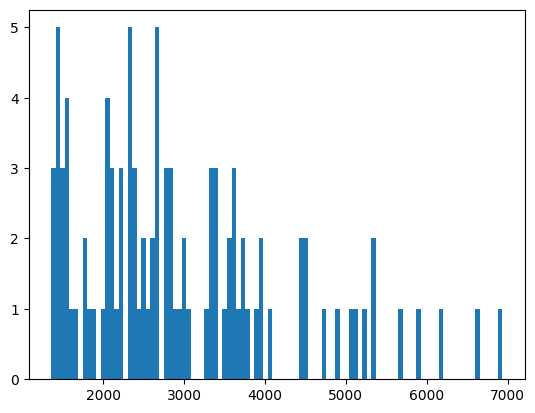

In [63]:
plt.hist([len(x) for x in anatloc_cluster2indices], bins=100)
plt.show()

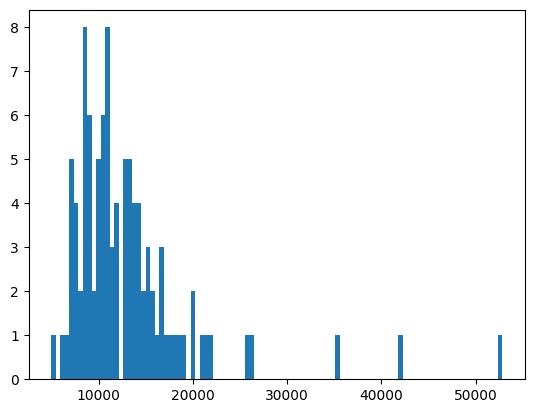

In [64]:
plt.hist([len(x) for x in obs_cluster2indices], bins=100)
plt.show()

In [66]:
import random

cid = 6
for i in random.sample(anatloc_cluster2indices[cid], 20):
    print(sentence_embeddings['sentences'][i])

right lateral aspect of the previously identified basilar pneumothorax
superior right thoracic cavity
right lung's superior aspect after surgery
right chest wall in the lower area
right-sided subcutaneous catheter
right lung at the fifth intercostal notch
right lateral space
right lower mid chest compartment
right lateral chest wall lower
right upper lateral hemithoracic compartment
lower in position compared to the right apical opacity
remnant of the right upper lobe bronchus
right chest walls
located in front of the right major fissure
upper apical area of the right hemithorax
right lower chest wall lateral area
right chest wall below the skin
pleural membrane at the apex of the right lung
right apical subpleural
right hemithoracic apicolateral aspects


In [67]:
cid = 6
for i in random.sample(obs_cluster2indices[cid], 20):
    print(sentence_embeddings['sentences'][i])

truncation of the right lateral collarbone
degenerative changes at the right bilateral acromioclavicular joints
rule out pneumonia
possibility of small airways disease
subtle opacity over left fourth rib
lucency anteriorly on the previous lateral view
probable innocuous calcified granuloma
nodular opacification in the retrosternal region on the lateral view
8-mm possible pulmonary nodule
no consolidative opacity on the lateral view
potential calcified granuloma
minimal peribronchiolar opacities in the right infrahilar region
small deviation of the fracture in the right posterolateral seventh rib
exhibiting a posterior projection on the lateral view
degenerative abnormalities of the AC joint in both shoulders
no vertebral body depression fracture
slight opacity in the outer region of the upper half of the chest
likelihood of an enlarged thyroid gland on the right side
nodular shadows projecting over the right anterior fifth rib
subtle ovoid 7-8 mm nodular opacity projecting over the rig